## UMAP visualization

### Import packages and setup enviornment

In [1]:
from umap import UMAP
import umap.plot
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns
import sklearn.datasets as skn
import ast
import re

import pandas as pd
import numpy as np

### Read and clean data

In [2]:
df_final = pd.read_csv('df_final.csv', index_col = 0)
genre_10 = pd.read_csv('genre_10.csv', index_col = 0)

In [3]:
df_final['track_genre_val'].value_counts()

rock                            6640
indie                           5485
electronic                      3652
pop                             2205
alternative                     1747
                                ... 
Pat Metheny                        1
look up later                      1
punkcore                           1
the very best of 2000 - 2010       1
belew                              1
Name: track_genre_val, Length: 2568, dtype: int64

In [4]:
def remove_changeline(factor):
    return factor.replace('\n','')

def remove_space(factor):
    s = factor
    return re.sub("\s\s+" , " ", s)

def add_comma(factor):
    return factor.replace(' ', ',')

In [5]:
df_final['item_factor'] = df_final['item_factor'].apply(lambda x: remove_changeline(x))
df_final['item_factor'] = df_final['item_factor'].apply(lambda x: remove_space(x))
df_final['item_factor'] = df_final['item_factor'].apply(lambda x: add_comma(x))
df_final['item_factor'] = df_final['item_factor'].apply(lambda x: ast.literal_eval(x))

In [6]:
item_factors = pd.DataFrame(np.array(list(df_final['item_factor'])).T.tolist())

In [7]:
for i in range(item_factors.shape[0]):
    df_final['feature_'+str(i)] = np.array(item_factors.loc[i,:])

In [8]:
df_final

track_genre_val    year  \
19                80s  1984.0   
20                80s  1984.0   
21                80s  1984.0   
22                80s  1984.0   
23                80s  1984.0   
...               ...     ...   
84073             NaN  2002.0   
84074             NaN  2002.0   
84075             NaN  2004.0   
84076             NaN  2002.0   
84077             NaN  2003.0   

                                             item_factor  feature_0  \
19     [0.0, 0.02217899, 0.01456057, 0.08075973, 0.04...   0.000000   
20     [0.0, 0.02217899, 0.01456057, 0.08075973, 0.04...   0.000000   
21     [0.0, 0.02217899, 0.01456057, 0.08075973, 0.04...   0.000000   
22     [0.0, 0.02217899, 0.01456057, 0.08075973, 0.04...   0.000000   
23     [0.0, 0.02217899, 0.01456057, 0.08075973, 0.04...   0.000000   
...                                                  ...        ...   
84073  [0.0, 0.0, 0.0, 0.0, 0.0, 0.00115411, 0.000810...   0.000000   
84074  [0.00067974726, 0.0, 0.006055499, 0.0, 2.59781...   0.000680   
84075  [0.0, 0.0, 0.00658189, 0.00013213, 0.00315406,...   0.000000   
84076  [0.0, 0.0, 0.0, 0.00122118, 0.0, 0.0, 0.0, 0.0...   0.000000   
84077  [0.00045911, 0.0, 0.0, 0.00046286, 0.0, 0.0007...   0.000459   

       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
19      0.022179   0.014561   0.080760   0.046143   0.011469   0.000000   
20      0.022179   0.014561   0.080760   0.046143   0.011469   0.000000   
21      0.022179   0.014561   0.080760   0.046143   0.011469   0.000000   
22      0.022179   0.014561   0.080760   0.046143   0.011469   0.000000   
23      0.022179   0.014561   0.080760   0.046143   0.011469   0.000000   
...          ...        ...        ...        ...        ...        ...   
84073   0.000000   0.000000   0.000000   0.000000   0.001154   0.000810   
84074   0.000000   0.006055   0.000000   0.000026   0.003103   0.000000   
84075   0.000000   0.006582   0.000132   0.003154   0.000000   0.000811   
84076   0.000000   0.000000   0.001221   0.000000   0.000000   0.000000   
84077   0.000000   0.000000   0.000463   0.000000   0.000786   0.000000   

       feature_7  feature_8  feature_9  
19      0.182374   0.000000   0.002041  
20      0.182374   0.000000   0.002041  
21      0.182374   0.000000   0.002041  
22      0.182374   0.000000   0.002041  
23      0.182374   0.000000   0.002041  
...          ...        ...        ...  
84073   0.000222   0.000000   0.000000  
84074   0.000000   0.000446   0.000028  
84075   0.000000   0.000000   0.000386  
84076   0.000154   0.000000   0.000808  
84077   0.000000   0.000000   0.000000  

[69951 rows x 13 columns]

### Read top 13 genre tags for further data cleaning

In our visualization, we would like to use track genre as our target label, but the genre space is very sparse, with 5769 unique track genres. Plotting a map of 5k labels would obsucre our analysis, especially when some track genre appeared only once. Hence, we decided to only label the top 13 track genres and label all other track genre as "other" and "None" genre as "NA", resulting in 15 labels for visualization at the end.

In [9]:
genre_10 = list(genre_10['genre'])

In [10]:
def get_genre(genre):
    if genre in genre_10:
        return genre
    if genre != genre:
        return 'NA'
    return 'other'

In [11]:
df_final['track_genre'] = df_final['track_genre_val'].apply(lambda x: get_genre(x))

In [12]:
df_final = df_final.drop('track_genre_val', axis = 1)

In [17]:
df_final['track_genre'].value_counts()

other               38586
NA                   9081
rock                 6640
indie                5485
electronic           3652
pop                  2205
alternative          1747
indie rock           1299
alternative rock      828
Love                  123
favorites              89
00s                    80
beautiful              71
american               38
Awesome                27
Name: track_genre, dtype: int64

The above list counts the occurrence of each of the 15 track genre labels. Note that due to the sparse genre space, NA and other genre takes up the largest proportions of the space.

In [18]:
# for umap learning, we would like to integer encode the categorical variables: artist term and track genre
# df_final['artist_term'] = df_final['artist_term'].astype('category')
# df_final['artist_term'] = df_final['artist_term'].cat.codes

df_final['year'] = df_final['year'].astype('category')

In [19]:
df_final

year                                        item_factor  feature_0  \
19     1984.0  [0.0, 0.02217899, 0.01456057, 0.08075973, 0.04...   0.000000   
20     1984.0  [0.0, 0.02217899, 0.01456057, 0.08075973, 0.04...   0.000000   
21     1984.0  [0.0, 0.02217899, 0.01456057, 0.08075973, 0.04...   0.000000   
22     1984.0  [0.0, 0.02217899, 0.01456057, 0.08075973, 0.04...   0.000000   
23     1984.0  [0.0, 0.02217899, 0.01456057, 0.08075973, 0.04...   0.000000   
...       ...                                                ...        ...   
84073  2002.0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.00115411, 0.000810...   0.000000   
84074  2002.0  [0.00067974726, 0.0, 0.006055499, 0.0, 2.59781...   0.000680   
84075  2004.0  [0.0, 0.0, 0.00658189, 0.00013213, 0.00315406,...   0.000000   
84076  2002.0  [0.0, 0.0, 0.0, 0.00122118, 0.0, 0.0, 0.0, 0.0...   0.000000   
84077  2003.0  [0.00045911, 0.0, 0.0, 0.00046286, 0.0, 0.0007...   0.000459   

       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
19      0.022179   0.014561   0.080760   0.046143   0.011469   0.000000   
20      0.022179   0.014561   0.080760   0.046143   0.011469   0.000000   
21      0.022179   0.014561   0.080760   0.046143   0.011469   0.000000   
22      0.022179   0.014561   0.080760   0.046143   0.011469   0.000000   
23      0.022179   0.014561   0.080760   0.046143   0.011469   0.000000   
...          ...        ...        ...        ...        ...        ...   
84073   0.000000   0.000000   0.000000   0.000000   0.001154   0.000810   
84074   0.000000   0.006055   0.000000   0.000026   0.003103   0.000000   
84075   0.000000   0.006582   0.000132   0.003154   0.000000   0.000811   
84076   0.000000   0.000000   0.001221   0.000000   0.000000   0.000000   
84077   0.000000   0.000000   0.000463   0.000000   0.000786   0.000000   

       feature_7  feature_8  feature_9 track_genre  
19      0.182374   0.000000   0.002041       other  
20      0.182374   0.000000   0.002041       other  
21      0.182374   0.000000   0.002041       other  
22      0.182374   0.000000   0.002041       other  
23      0.182374   0.000000   0.002041       other  
...          ...        ...        ...         ...  
84073   0.000222   0.000000   0.000000          NA  
84074   0.000000   0.000446   0.000028          NA  
84075   0.000000   0.000000   0.000386          NA  
84076   0.000154   0.000000   0.000808          NA  
84077   0.000000   0.000000   0.000000          NA  

[69951 rows x 13 columns]

Out of concern that the sheer size of the other and the NA genres would obscure the visualization, we also prepared a dataset that excludes other and NA genre for a back-up visualization.

In [20]:
df_plot = df_final[df_final['track_genre'] != 'other']

In [21]:
df_plot = df_plot[df_plot['track_genre'] != 'NA']

In [22]:
df_plot

year                                        item_factor  feature_0  \
27     2003.0  [0.01033728, 0.17433004, 0.09315494, 0.0262859...   0.010337   
28     2003.0  [0.01033728, 0.17433004, 0.09315494, 0.0262859...   0.010337   
29     2003.0  [0.01033728, 0.17433004, 0.09315494, 0.0262859...   0.010337   
30     2003.0  [0.01033728, 0.17433004, 0.09315494, 0.0262859...   0.010337   
31     2003.0  [0.01033728, 0.17433004, 0.09315494, 0.0262859...   0.010337   
...       ...                                                ...        ...   
72884  1991.0  [0.0, 0.0, 0.00011123, 0.0, 0.0, 0.00027404, 0...   0.000000   
72886  1996.0  [0.01468789, 0.0, 0.00012855, 0.0, 0.0, 0.0088...   0.014688   
72899  2000.0  [0.00098113, 0.0, 0.00443223, 0.00466053, 0.0,...   0.000981   
72910  2006.0  [0.00060358, 0.0, 0.00269953, 0.00238871, 0.0,...   0.000604   
72938  1982.0  [0.0, 0.0, 0.00983446, 0.0, 0.00732587, 0.0, 0...   0.000000   

       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
27       0.17433   0.093155   0.026286   0.047800   0.019505   0.077713   
28       0.17433   0.093155   0.026286   0.047800   0.019505   0.077713   
29       0.17433   0.093155   0.026286   0.047800   0.019505   0.077713   
30       0.17433   0.093155   0.026286   0.047800   0.019505   0.077713   
31       0.17433   0.093155   0.026286   0.047800   0.019505   0.077713   
...          ...        ...        ...        ...        ...        ...   
72884    0.00000   0.000111   0.000000   0.000000   0.000274   0.000000   
72886    0.00000   0.000129   0.000000   0.000000   0.008841   0.000000   
72899    0.00000   0.004432   0.004661   0.000000   0.027432   0.000000   
72910    0.00000   0.002700   0.002389   0.000000   0.013038   0.000000   
72938    0.00000   0.009834   0.000000   0.007326   0.000000   0.000000   

       feature_7  feature_8  feature_9       track_genre  
27      0.022663   0.069290   0.181539             indie  
28      0.022663   0.069290   0.181539             indie  
29      0.022663   0.069290   0.181539             indie  
30      0.022663   0.069290   0.181539             indie  
31      0.022663   0.069290   0.181539             indie  
...          ...        ...        ...               ...  
72884   0.000000   0.000000   0.000000             indie  
72886   0.000000   0.000000   0.003702  alternative rock  
72899   0.009801   0.008808   0.000000              rock  
72910   0.000000   0.000000   0.000000              rock  
72938   0.001565   0.000681   0.000376              rock  

[22284 rows x 13 columns]

### Data preparation for UMAP parameter tunings

In [23]:
np.random.seed = 42
df_final_sample = df_final.sample(20000, random_state = 42)

In [24]:
labels_withNAother = df_final_sample['track_genre']
data_withNAother = df_final_sample[
    [
        "feature_0",
        "feature_1",
        "feature_2",
        "feature_3",
        "feature_4",
        "feature_5",
        "feature_6",
        "feature_7",
        "feature_8",
        "feature_9",
    ]
].values

In [25]:
labels_withoutNAother = df_plot['track_genre']
data_withoutNAother = df_plot[
    [
        "feature_0",
        "feature_1",
        "feature_2",
        "feature_3",
        "feature_4",
        "feature_5",
        "feature_6",
        "feature_7",
        "feature_8",
        "feature_9",
    ]
].values

In [26]:
from sklearn.preprocessing import StandardScaler
scaled_data_withNAother = StandardScaler().fit_transform(data_withNAother)
scaled_data_withoutNAother = StandardScaler().fit_transform(data_withoutNAother)

### Parameter tuning for UMAP on datasets with/ without NA and other genre

Before anything, below is a blind first trial plot.

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.001, n_neighbors=200,
     random_state=42, spread=2, verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:04:14 2021 Finding Nearest Neighbors
Mon May 17 08:04:14 2021 Building RP forest with 12 trees
Mon May 17 08:04:14 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Mon May 17 08:06:14 2021 Finished Nearest Neighbor Search
Mon May 17 08:06:17 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:06:41 2021 Finished embedding


<AxesSubplot:>

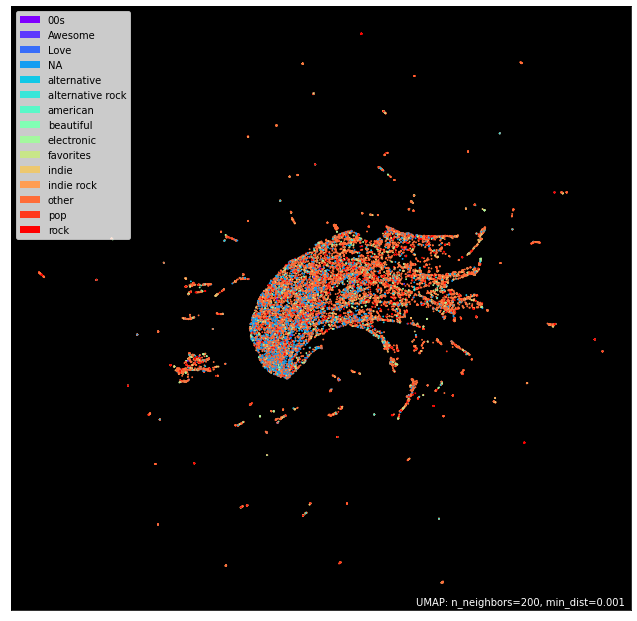

In [27]:
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
              spread = 2, n_neighbors = 200,
             min_dist = 0.001).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.001, n_neighbors=200,
     random_state=42, spread=2, verbose=True)
Construct fuzzy simplicial set
Mon May 17 06:38:28 2021 Finding Nearest Neighbors
Mon May 17 06:38:28 2021 Building RP forest with 12 trees
Mon May 17 06:38:28 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Mon May 17 06:40:24 2021 Finished Nearest Neighbor Search
Mon May 17 06:40:25 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 06:40:51 2021 Finished embedding


<AxesSubplot:>

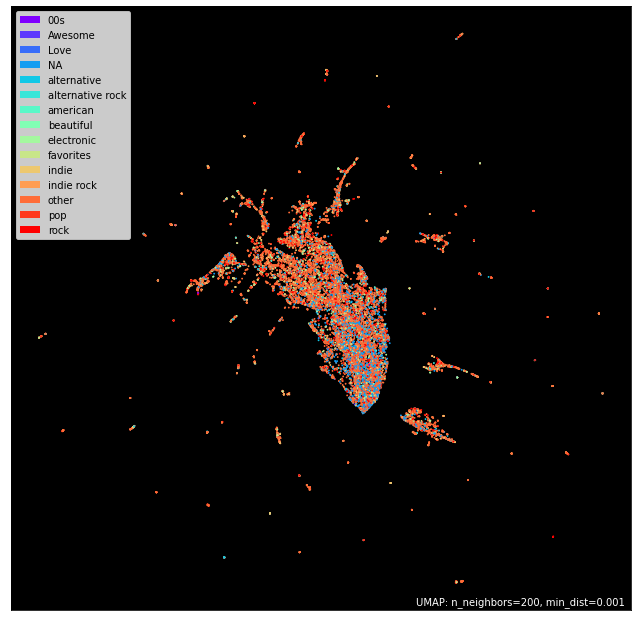

In [35]:
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
              spread = 2, n_neighbors = 200,
             min_dist = 0.001).fit(data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, verbose=True)
Construct fuzzy simplicial set
Mon May 17 06:43:11 2021 Finding Nearest Neighbors
Mon May 17 06:43:11 2021 Building RP forest with 12 trees
Mon May 17 06:43:12 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 06:43:15 2021 Finished Nearest Neighbor Search
Mon May 17 06:43:15 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 06:43:29 2021 Finished embedding


<AxesSubplot:>

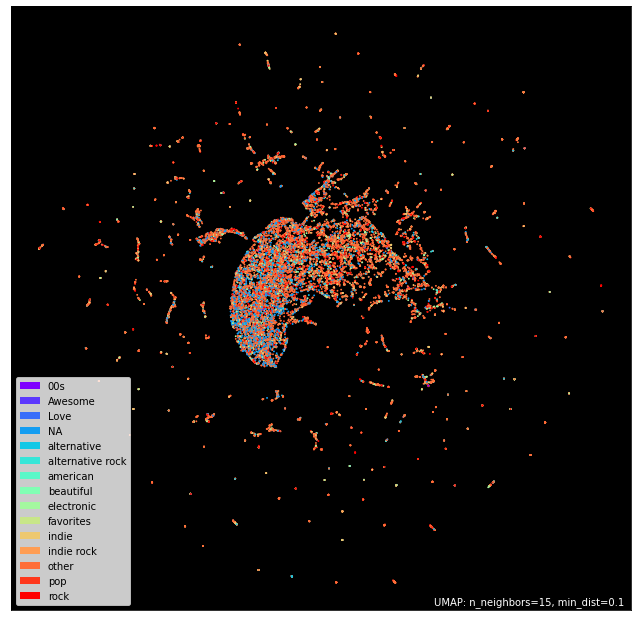

In [36]:
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True).fit(data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
# plt.savefig('10_0.01_100_percent_400k_66.eps')

Based on the trial above, I re-designed a workflow of parameter tuning that will be followed in the rest of this notebook. The parameters to be tuned are assumed to be the interest of concern (because they should influence the shape of the plot the most) in this visualization project.

#### Summary: work flow of this section
1. parameter tuning using 70k+ data (with other and NA genre, full dataset): 

    #### tuned on spread, n_neighbor, min_dist, n_epoch

    i. logic resembles that of the basic recommendation: control the rest and change one to get a range of best looking parameters
    
    ii. grid search on 3*3 grid of parameters and find the best looking set of parameters

2. parameter tuning using random sampled 20k data (without other and NA) for fast tuning

    #### tuned on spread, n_neighbor, min_dist, n_epoch
    
    the same workflow as in bullet 1, for dataset with other and NA genre
    
    
3. plot full dataset with NA and other (200k) & without NA and other (70k)

In [30]:
# Parameters for fine tuning
spread = [0.1, 0.5, 0.75, 1, 1.5, 2, 3, 5, 10, 50] # default = 1
n_neighbors = [20, 50, 100, 200, 300, 400, 500, 1000, 1500, 2000] # default = 15
min_dist = [0.00000001, 0.0000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1] # default = 0.1
n_epoch = [] # default = None; 200 for large dataset, 500 for small

1. Dataset with NA and other genre

1.1 Tuning on n_neighbors, other parameters held defaul

In [26]:
time_nn = []

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=20, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 06:11:29 2021 Finding Nearest Neighbors
Mon May 17 06:11:29 2021 Building RP forest with 12 trees
Mon May 17 06:11:29 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 06:11:35 2021 Finished Nearest Neighbor Search
Mon May 17 06:11:35 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 06:11:51 2021 Finished embedding
0:00:21.963668


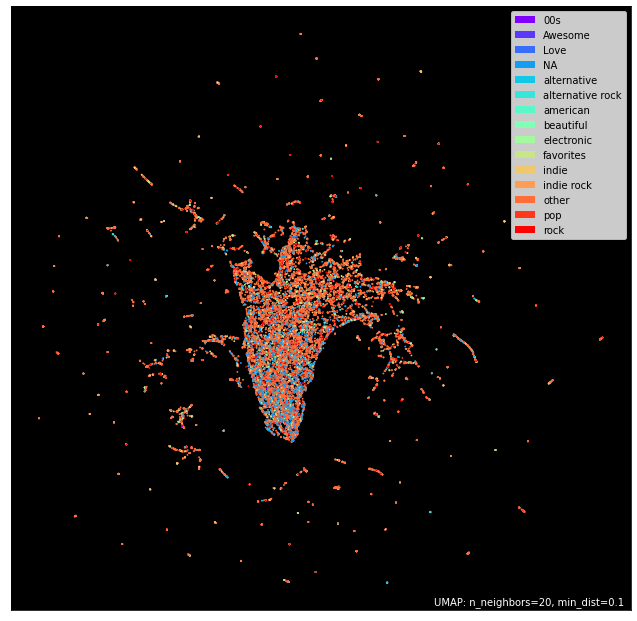

In [28]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[0]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=50, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 06:20:10 2021 Finding Nearest Neighbors
Mon May 17 06:20:10 2021 Building RP forest with 12 trees
Mon May 17 06:20:10 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Mon May 17 06:20:36 2021 Finished Nearest Neighbor Search
Mon May 17 06:20:36 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 06:20:53 2021 Finished embedding
0:00:43.853419


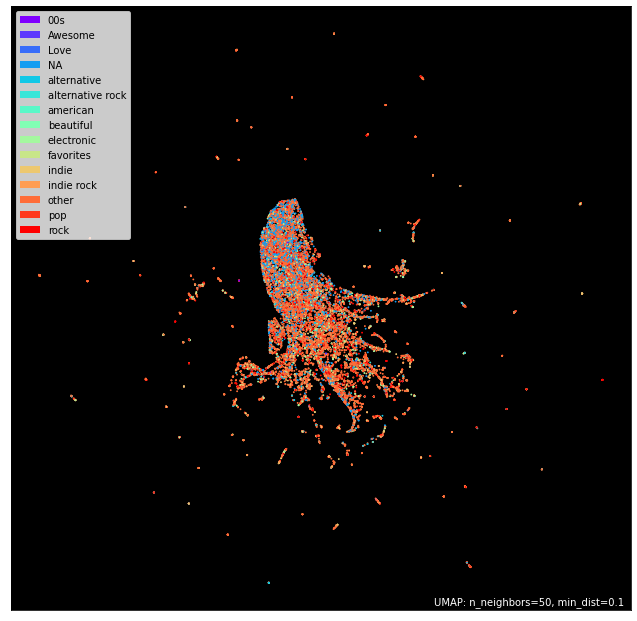

In [31]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[1]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

In [32]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[2]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=100, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 06:23:20 2021 Finding Nearest Neighbors
Mon May 17 06:23:20 2021 Building RP forest with 12 trees
Mon May 17 06:23:20 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Mon May 17 06:24:47 2021 Finished Nearest Neighbor Search
Mon May 17 06:24:47 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 06:25:09 2021 Finished embedding
0:01:48.724848


UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=200, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 06:25:26 2021 Finding Nearest Neighbors
Mon May 17 06:25:26 2021 Building RP forest with 12 trees
Mon May 17 06:25:26 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Mon May 17 06:27:23 2021 Finished Nearest Neighbor Search
Mon May 17 06:27:24 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 06:27:50 2021 Finished embedding
0:02:23.655447


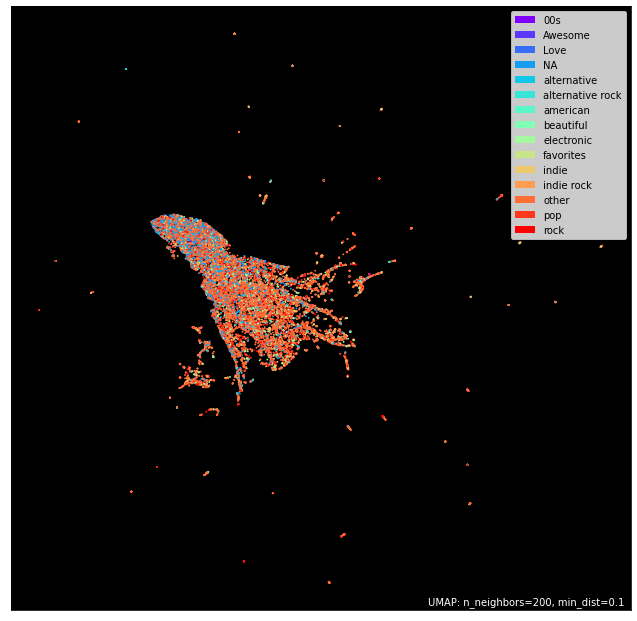

In [33]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[3]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=300, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 06:33:02 2021 Finding Nearest Neighbors
Mon May 17 06:33:02 2021 Building RP forest with 12 trees
Mon May 17 06:33:02 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Mon May 17 06:35:17 2021 Finished Nearest Neighbor Search
Mon May 17 06:35:19 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 06:35:47 2021 Finished embedding
0:02:45.111754


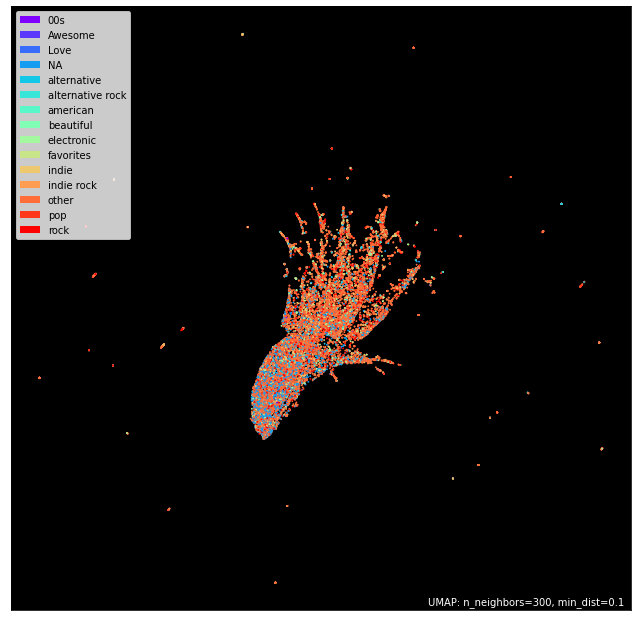

In [34]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[4]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=400, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 06:46:00 2021 Finding Nearest Neighbors
Mon May 17 06:46:00 2021 Building RP forest with 12 trees
Mon May 17 06:46:00 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 06:49:34 2021 Finished Nearest Neighbor Search
Mon May 17 06:49:36 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 06:50:05 2021 Finished embedding
0:04:04.867756


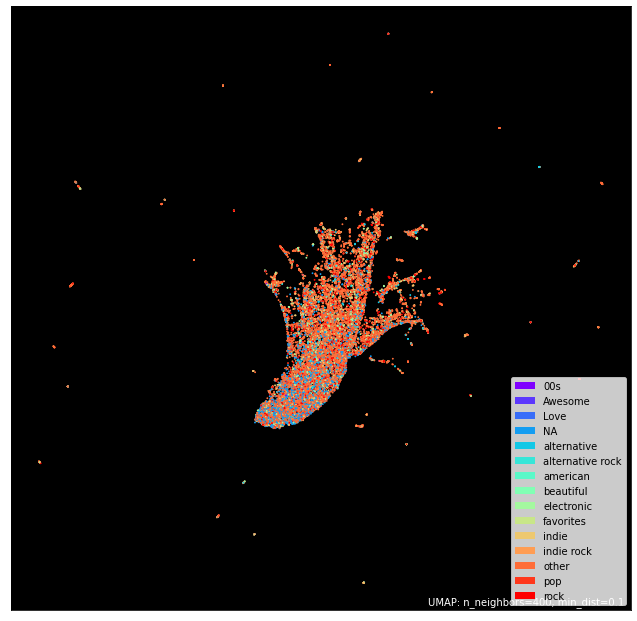

In [37]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[5]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

In [38]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[6]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=500, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 06:51:44 2021 Finding Nearest Neighbors
Mon May 17 06:51:44 2021 Building RP forest with 12 trees
Mon May 17 06:51:44 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 06:55:46 2021 Finished Nearest Neighbor Search
Mon May 17 06:55:49 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 06:56:19 2021 Finished embedding
0:04:35.292220


UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=1000, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 06:58:29 2021 Finding Nearest Neighbors
Mon May 17 06:58:29 2021 Building RP forest with 12 trees
Mon May 17 06:58:29 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	Stopping threshold met -- exiting after 5 iterations
Mon May 17 07:06:21 2021 Finished Nearest Neighbor Search
Mon May 17 07:06:26 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:07:01 2021 Finished embedding
0:08:32.188389


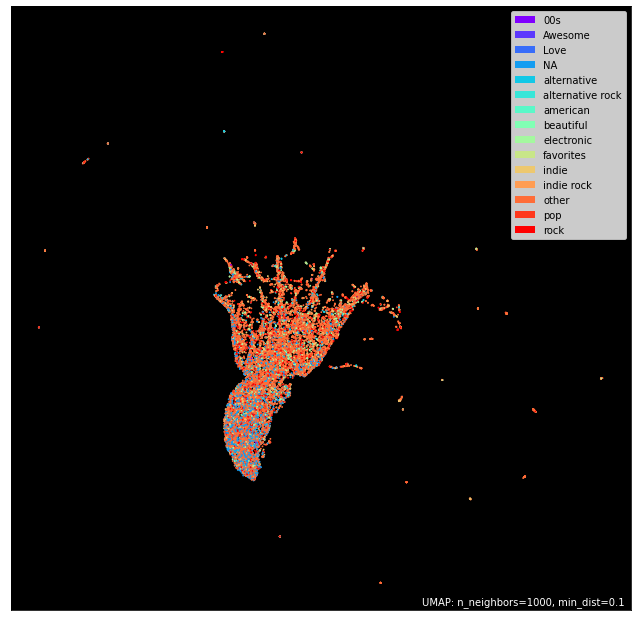

In [39]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[7]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=1500, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:08:02 2021 Finding Nearest Neighbors
Mon May 17 07:08:02 2021 Building RP forest with 12 trees
Mon May 17 07:08:03 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Mon May 17 07:21:07 2021 Finished Nearest Neighbor Search
Mon May 17 07:21:16 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:21:55 2021 Finished embedding
0:13:52.555644


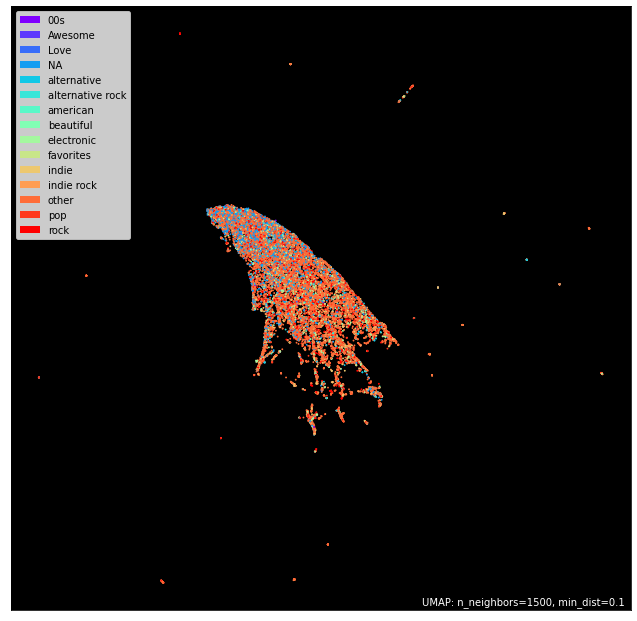

In [40]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[8]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

In [41]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[9]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=2000, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:22:40 2021 Finding Nearest Neighbors
Mon May 17 07:22:40 2021 Building RP forest with 12 trees
Mon May 17 07:22:40 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	Stopping threshold met -- exiting after 7 iterations
Mon May 17 07:42:14 2021 Finished Nearest Neighbor Search
Mon May 17 07:42:25 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:43:05 2021 Finished embedding
0:20:25.498207


In [43]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Parameter value of n_neighbors')

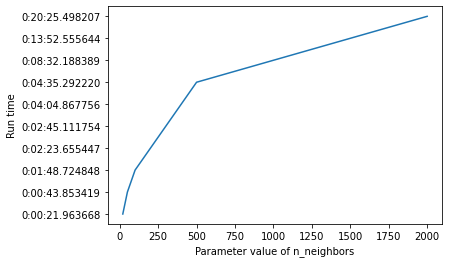

In [45]:
plt.plot(n_neighbors, time_nn)
plt.ylabel('Run time')
plt.xlabel('Parameter value of n_neighbors')

1.2 Tuning on spread, other parameters held default

In [47]:
time_s = []

/home/yw5280/.local/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=0.1, verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:46:16 2021 Finding Nearest Neighbors
Mon May 17 07:46:16 2021 Building RP forest with 12 trees
Mon May 17 07:46:16 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 07:46:20 2021 Finished Nearest Neighbor Search
Mon May 17 07:46:20 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:46:33 2021 Finished embedding
0:00:17.572122


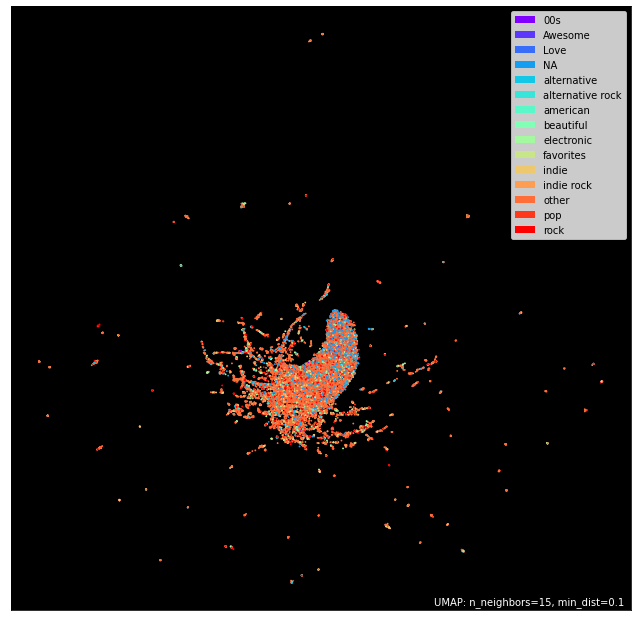

In [48]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[0]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=0.5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:46:38 2021 Finding Nearest Neighbors
Mon May 17 07:46:38 2021 Building RP forest with 12 trees
Mon May 17 07:46:38 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 07:46:41 2021 Finished Nearest Neighbor Search
Mon May 17 07:46:42 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:46:55 2021 Finished embedding
0:00:17.156038


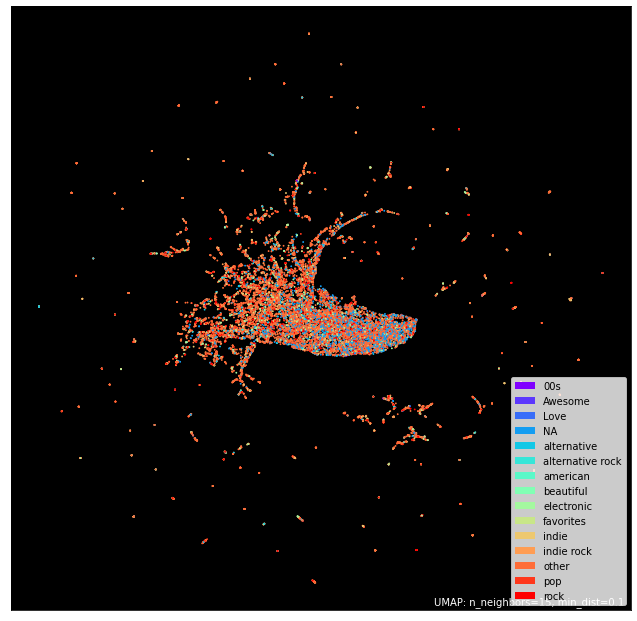

In [49]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[1]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=0.75, verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:47:10 2021 Finding Nearest Neighbors
Mon May 17 07:47:10 2021 Building RP forest with 12 trees
Mon May 17 07:47:10 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 07:47:14 2021 Finished Nearest Neighbor Search
Mon May 17 07:47:14 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:47:27 2021 Finished embedding
0:00:16.781432


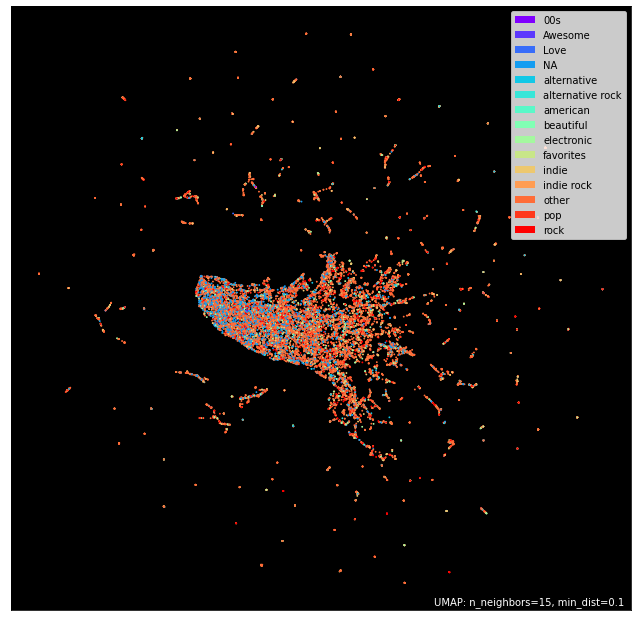

In [50]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[2]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

In [51]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[3]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=1, verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:47:36 2021 Finding Nearest Neighbors
Mon May 17 07:47:36 2021 Building RP forest with 12 trees
Mon May 17 07:47:36 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 07:47:39 2021 Finished Nearest Neighbor Search
Mon May 17 07:47:39 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:47:52 2021 Finished embedding
0:00:16.707325


In [52]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[4]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=1.5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:47:53 2021 Finding Nearest Neighbors
Mon May 17 07:47:53 2021 Building RP forest with 12 trees
Mon May 17 07:47:53 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 07:47:57 2021 Finished Nearest Neighbor Search
Mon May 17 07:47:57 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:48:10 2021 Finished embedding
0:00:17.330971


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=2, verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:48:11 2021 Finding Nearest Neighbors
Mon May 17 07:48:11 2021 Building RP forest with 12 trees
Mon May 17 07:48:11 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 07:48:15 2021 Finished Nearest Neighbor Search
Mon May 17 07:48:15 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:48:28 2021 Finished embedding
0:00:17.049654


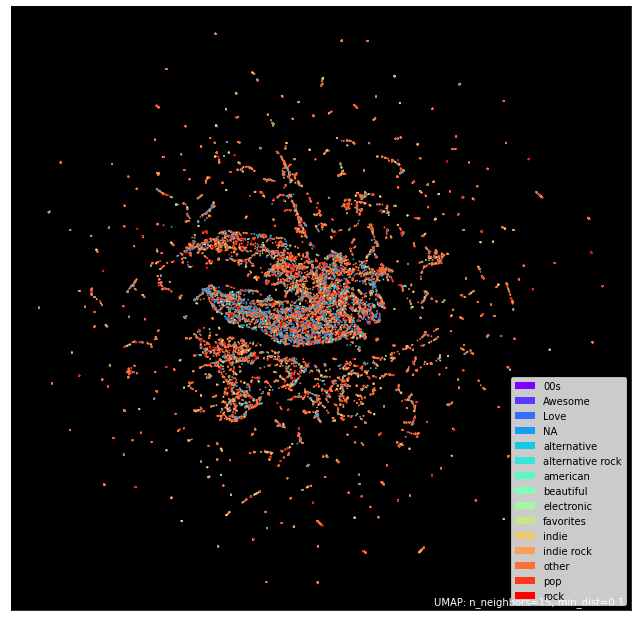

In [53]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[5]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

In [54]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[6]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=3, verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:48:29 2021 Finding Nearest Neighbors
Mon May 17 07:48:29 2021 Building RP forest with 12 trees
Mon May 17 07:48:29 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 07:48:33 2021 Finished Nearest Neighbor Search
Mon May 17 07:48:33 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:48:46 2021 Finished embedding
0:00:16.780230


/home/yw5280/.local/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:48:47 2021 Finding Nearest Neighbors
Mon May 17 07:48:47 2021 Building RP forest with 12 trees
Mon May 17 07:48:47 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 07:48:51 2021 Finished Nearest Neighbor Search
Mon May 17 07:48:51 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:49:03 2021 Finished embedding
0:00:16.701903


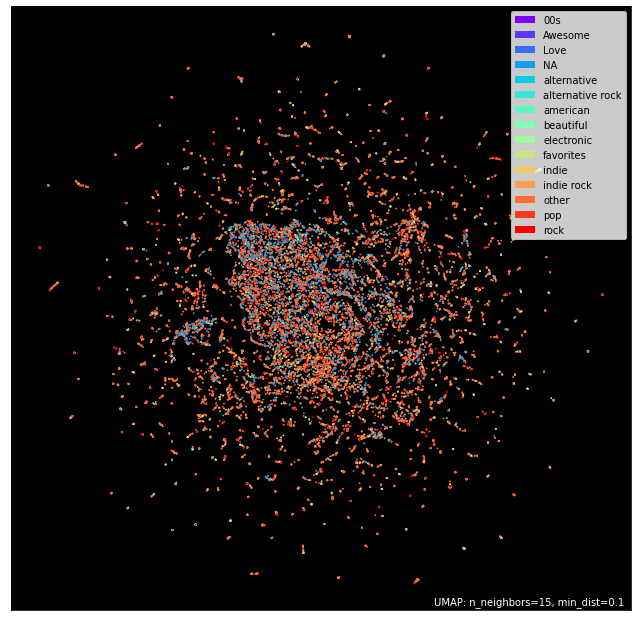

In [55]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[7]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

/home/yw5280/.local/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=10, verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:49:04 2021 Finding Nearest Neighbors
Mon May 17 07:49:04 2021 Building RP forest with 12 trees
Mon May 17 07:49:04 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 07:49:08 2021 Finished Nearest Neighbor Search
Mon May 17 07:49:08 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:49:22 2021 Finished embedding
0:00:18.318838


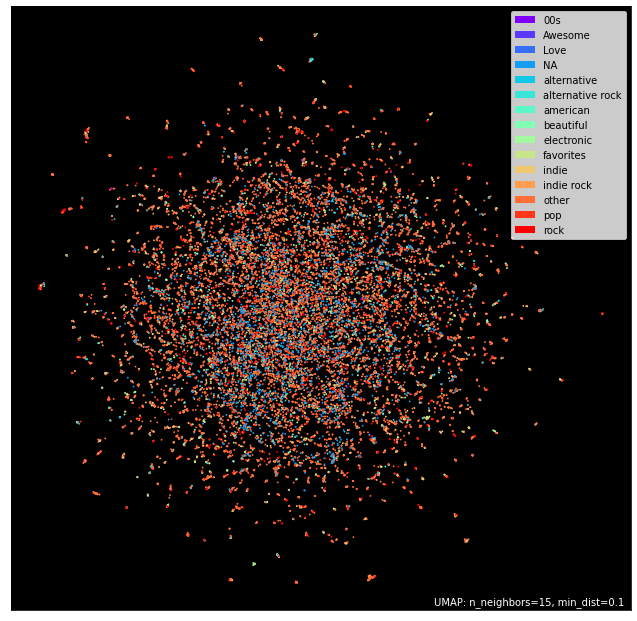

In [56]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[8]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

/home/yw5280/.local/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=50, verbose=True)
Construct fuzzy simplicial set
Mon May 17 07:49:24 2021 Finding Nearest Neighbors
Mon May 17 07:49:24 2021 Building RP forest with 12 trees
Mon May 17 07:49:24 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 07:49:27 2021 Finished Nearest Neighbor Search
Mon May 17 07:49:28 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 07:49:40 2021 Finished embedding
0:00:16.778080


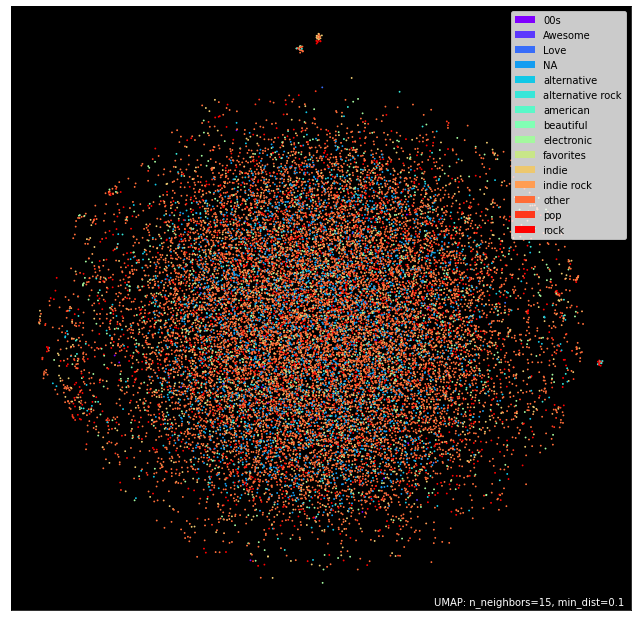

In [57]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[9]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

Text(0.5, 0, 'Parameter value of spread')

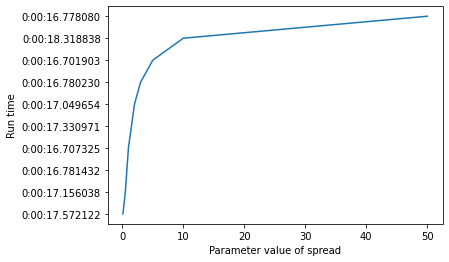

In [58]:
plt.plot(spread, time_s)
plt.ylabel('Run time')
plt.xlabel('Parameter value of spread')

1.3 Tuning on min_dist, other parameters held default

In [28]:
time_md = []

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=1e-08, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:07:25 2021 Finding Nearest Neighbors
Mon May 17 08:07:25 2021 Building RP forest with 12 trees
Mon May 17 08:07:25 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:07:28 2021 Finished Nearest Neighbor Search
Mon May 17 08:07:28 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:07:40 2021 Finished embedding
0:00:15.677853


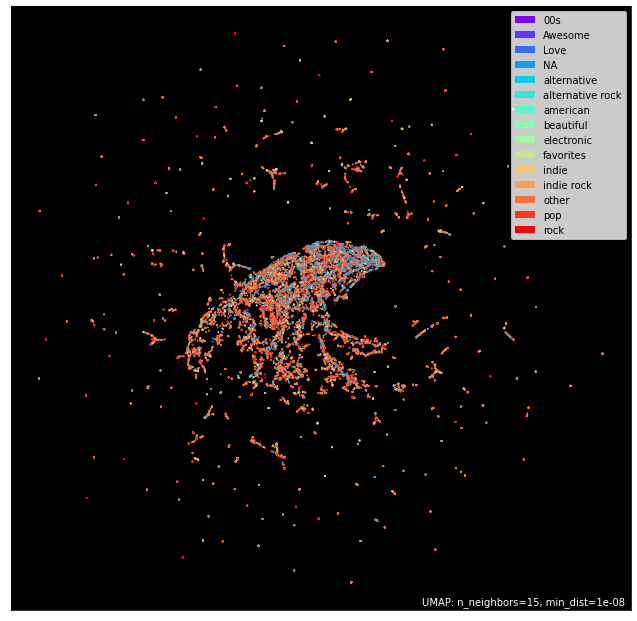

In [31]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[0]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=1e-07, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:07:41 2021 Finding Nearest Neighbors
Mon May 17 08:07:41 2021 Building RP forest with 12 trees
Mon May 17 08:07:41 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:07:45 2021 Finished Nearest Neighbor Search
Mon May 17 08:07:45 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:07:57 2021 Finished embedding
0:00:15.694771


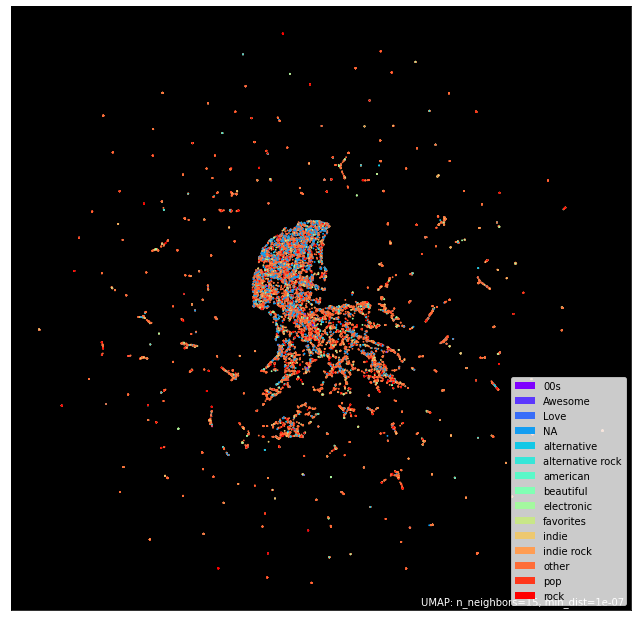

In [32]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[1]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=1e-05, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:07:58 2021 Finding Nearest Neighbors
Mon May 17 08:07:58 2021 Building RP forest with 12 trees
Mon May 17 08:07:58 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:08:01 2021 Finished Nearest Neighbor Search
Mon May 17 08:08:01 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:08:13 2021 Finished embedding
0:00:15.957271


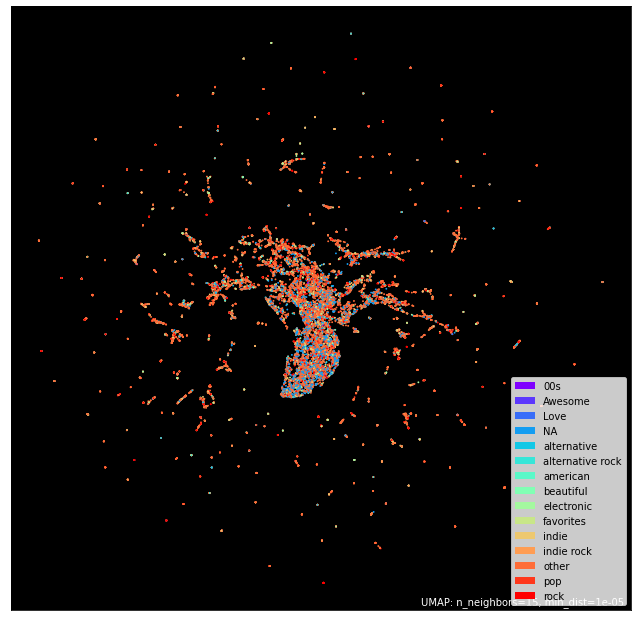

In [33]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[2]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.0001, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:08:14 2021 Finding Nearest Neighbors
Mon May 17 08:08:14 2021 Building RP forest with 12 trees
Mon May 17 08:08:14 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:08:18 2021 Finished Nearest Neighbor Search
Mon May 17 08:08:18 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:08:30 2021 Finished embedding
0:00:15.833645


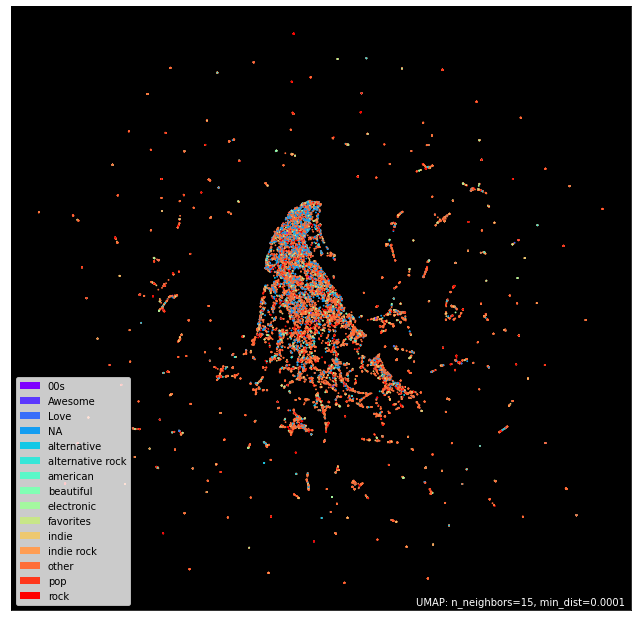

In [34]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[3]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.001, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:08:31 2021 Finding Nearest Neighbors
Mon May 17 08:08:31 2021 Building RP forest with 12 trees
Mon May 17 08:08:31 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:08:34 2021 Finished Nearest Neighbor Search
Mon May 17 08:08:35 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:08:47 2021 Finished embedding
0:00:15.688163


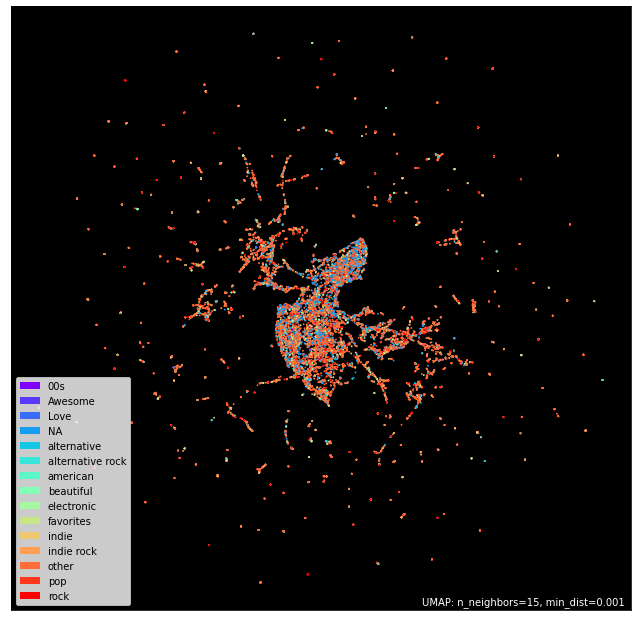

In [35]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[4]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.01, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:08:48 2021 Finding Nearest Neighbors
Mon May 17 08:08:48 2021 Building RP forest with 12 trees
Mon May 17 08:08:48 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:08:51 2021 Finished Nearest Neighbor Search
Mon May 17 08:08:51 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:09:03 2021 Finished embedding
0:00:16.016366


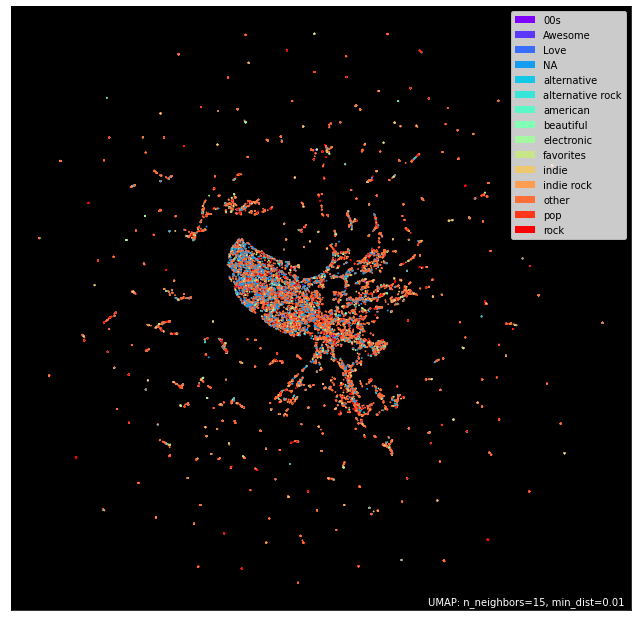

In [36]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[5]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

In [37]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[6]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.05, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:09:04 2021 Finding Nearest Neighbors
Mon May 17 08:09:04 2021 Building RP forest with 12 trees
Mon May 17 08:09:04 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:09:08 2021 Finished Nearest Neighbor Search
Mon May 17 08:09:08 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:09:20 2021 Finished embedding
0:00:15.862163


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:09:21 2021 Finding Nearest Neighbors
Mon May 17 08:09:21 2021 Building RP forest with 12 trees
Mon May 17 08:09:21 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:09:25 2021 Finished Nearest Neighbor Search
Mon May 17 08:09:25 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:09:37 2021 Finished embedding
0:00:15.811067


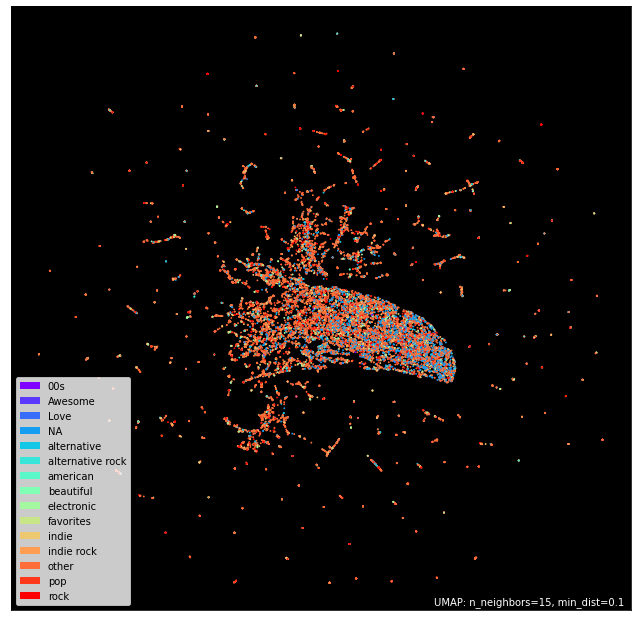

In [38]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[7]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.5, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:09:38 2021 Finding Nearest Neighbors
Mon May 17 08:09:38 2021 Building RP forest with 12 trees
Mon May 17 08:09:38 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:09:41 2021 Finished Nearest Neighbor Search
Mon May 17 08:09:41 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:09:53 2021 Finished embedding
0:00:15.469718


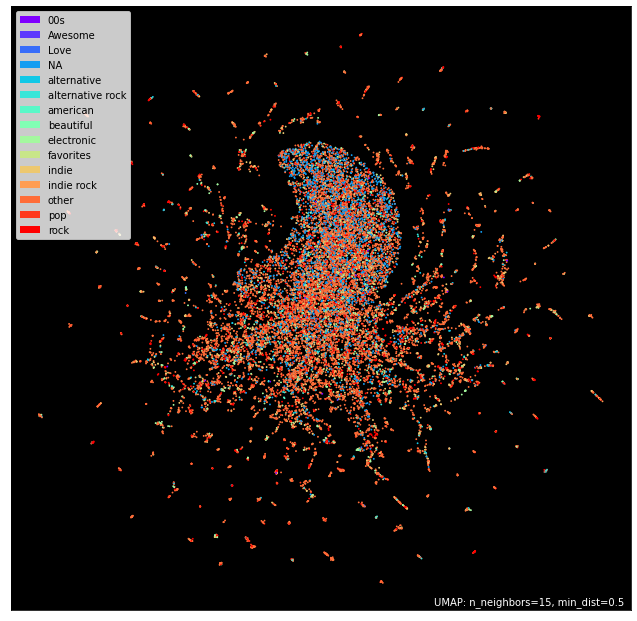

In [39]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[8]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=1, random_state=42, verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:09:54 2021 Finding Nearest Neighbors
Mon May 17 08:09:54 2021 Building RP forest with 12 trees
Mon May 17 08:09:54 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:09:58 2021 Finished Nearest Neighbor Search
Mon May 17 08:09:58 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:10:09 2021 Finished embedding
0:00:15.216072


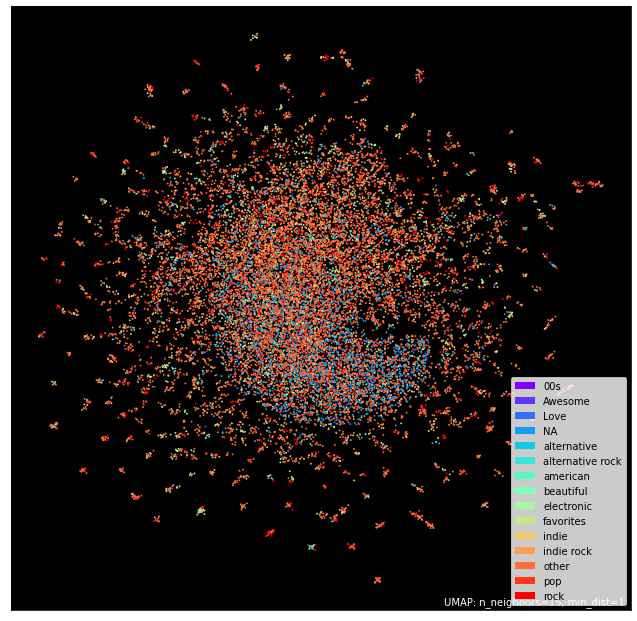

In [40]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[9]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

Text(0.5, 0, 'Parameter value of min_dist')

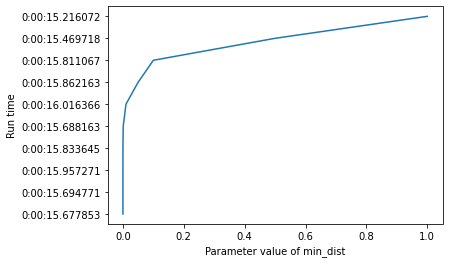

In [41]:
plt.plot(min_dist, time_md)
plt.ylabel('Run time')
plt.xlabel('Parameter value of min_dist')

1.4 grid search

In [42]:
n_neighbors = [n_neighbors[3], n_neighbors[4], n_neighbors[5]]
spread = [spread[1], spread[2], spread[3]]
min_dist = [min_dist[6], min_dist[7], min_dist[8]]

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.05, n_neighbors=200,
     random_state=42, spread=0.5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:11:13 2021 Finding Nearest Neighbors
Mon May 17 08:11:13 2021 Building RP forest with 12 trees
Mon May 17 08:11:13 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Mon May 17 08:13:01 2021 Finished Nearest Neighbor Search
Mon May 17 08:13:02 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:13:25 2021 Finished embedding
UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=200, random_state=42,
     spread=0.5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:13:2

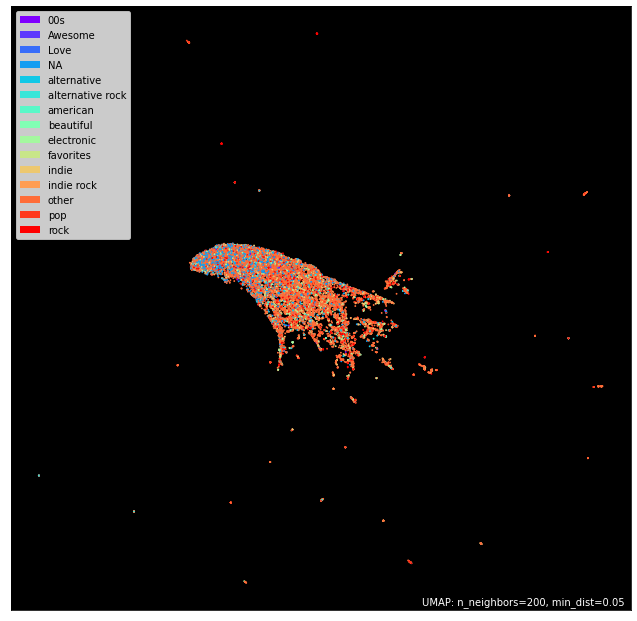

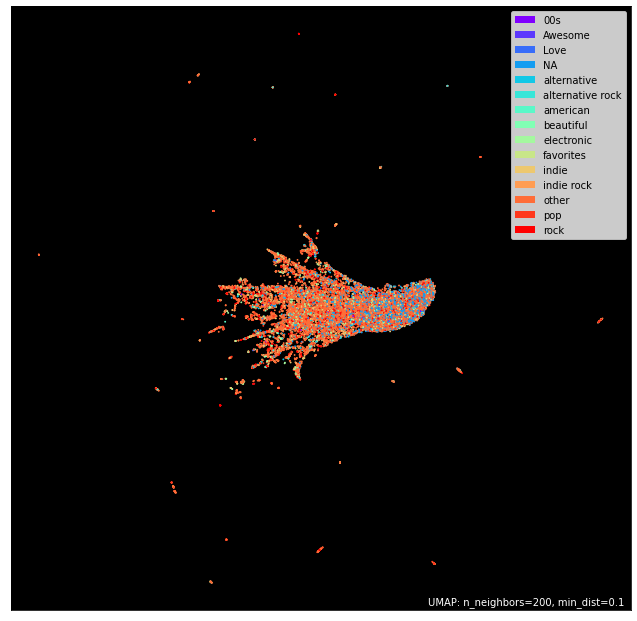

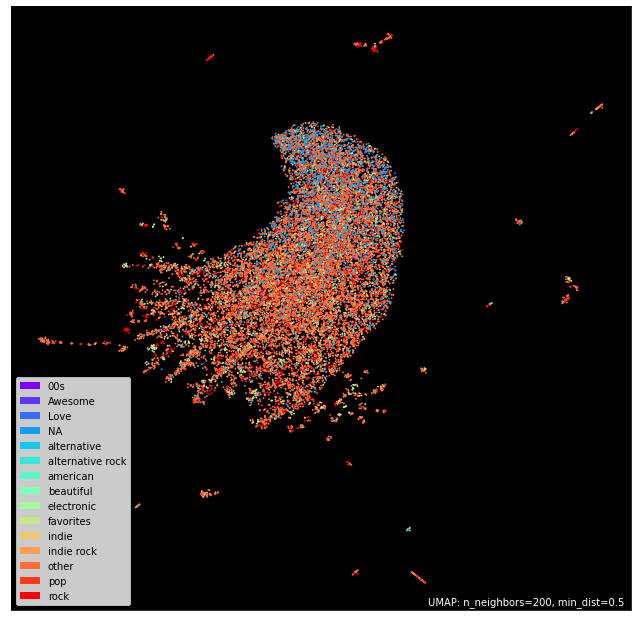

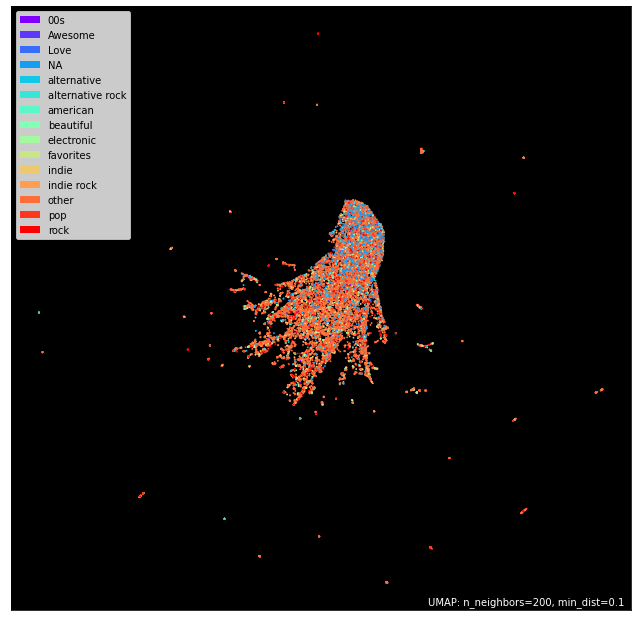

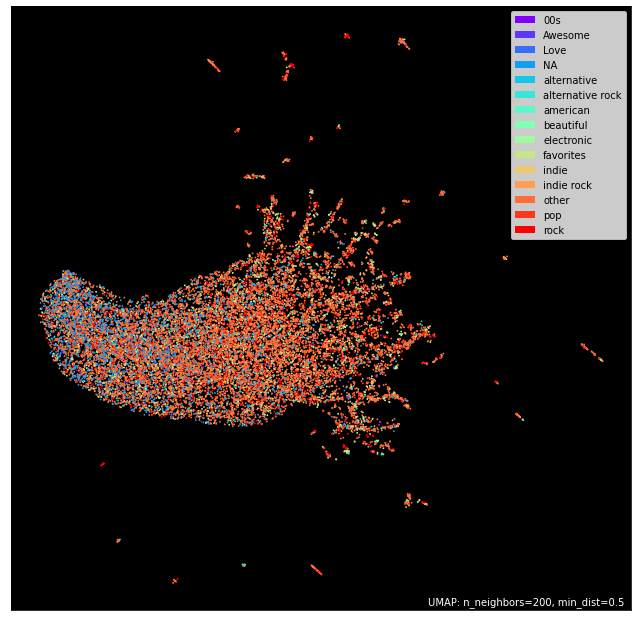

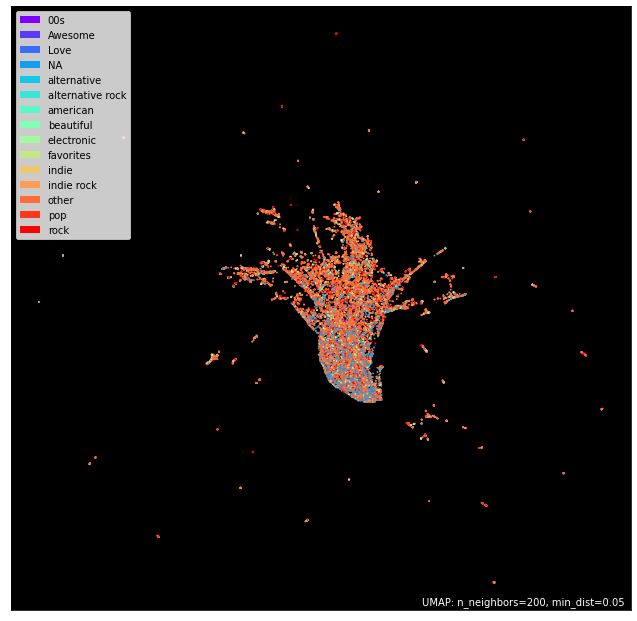

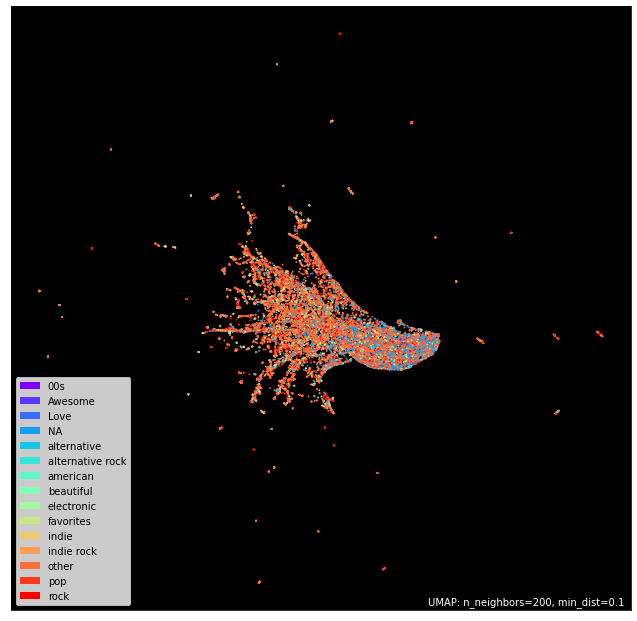

In [43]:
nn = n_neighbors[0]
for s in spread:
    for md in min_dist:
        start_time = time.time()
        mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
                     n_neighbors = nn, spread = s, min_dist = md,).fit(scaled_data_withNAother)

        umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
        end_time = time.time()
        str(datetime.timedelta(seconds = end_time - start_time))

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.05, n_neighbors=300,
     random_state=42, spread=0.5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:32:27 2021 Finding Nearest Neighbors
Mon May 17 08:32:27 2021 Building RP forest with 12 trees
Mon May 17 08:32:27 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Mon May 17 08:34:35 2021 Finished Nearest Neighbor Search
Mon May 17 08:34:36 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 08:35:01 2021 Finished embedding
UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=300, random_state=42,
     spread=0.5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:35:0

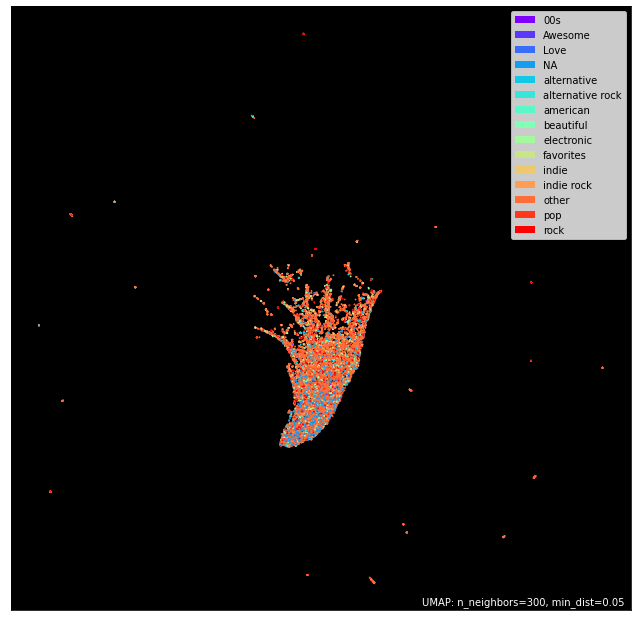

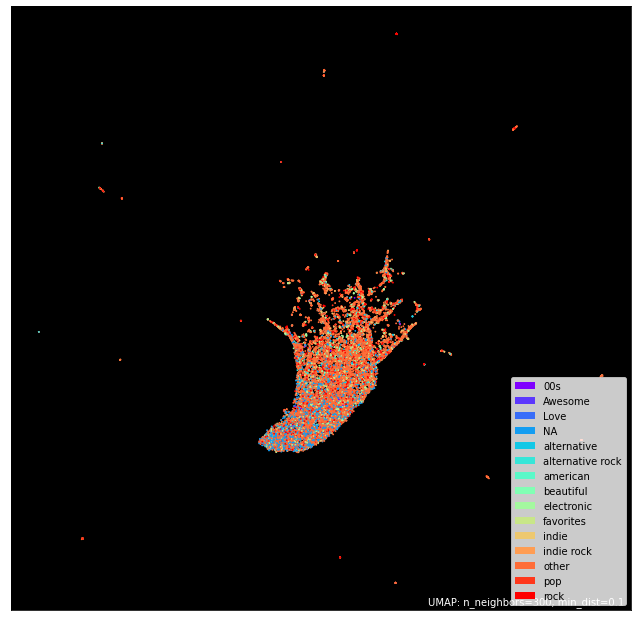

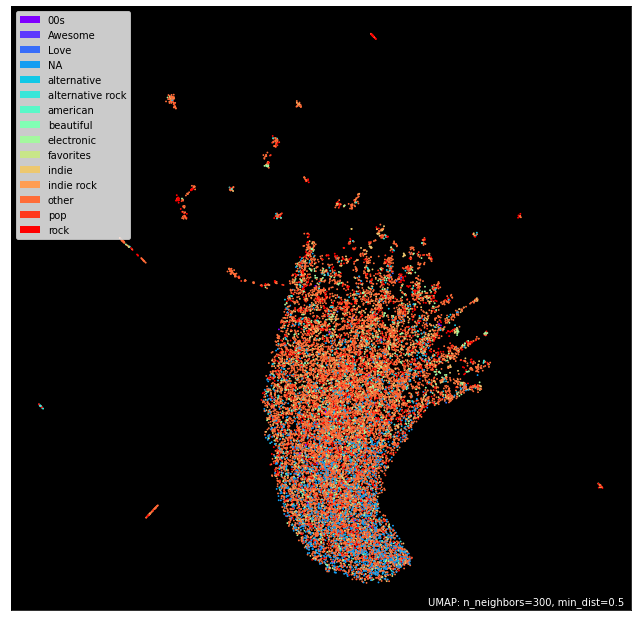

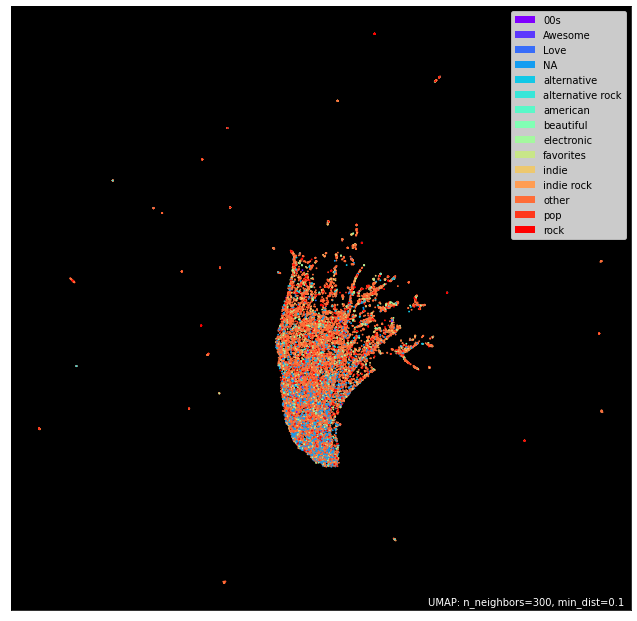

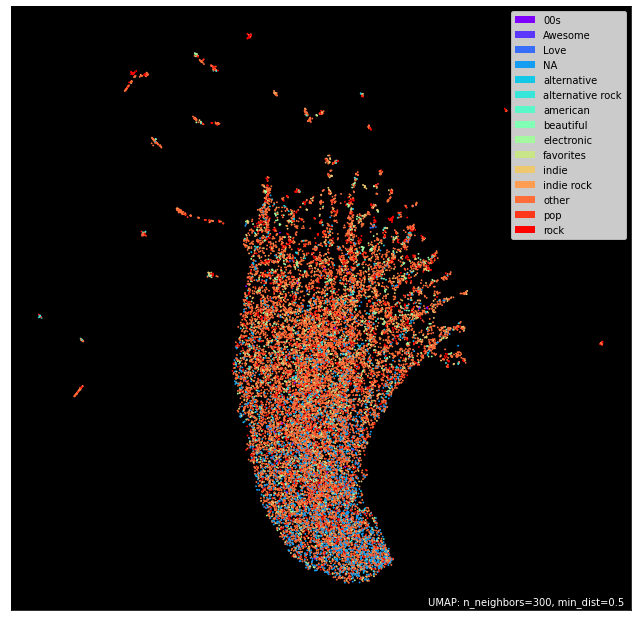

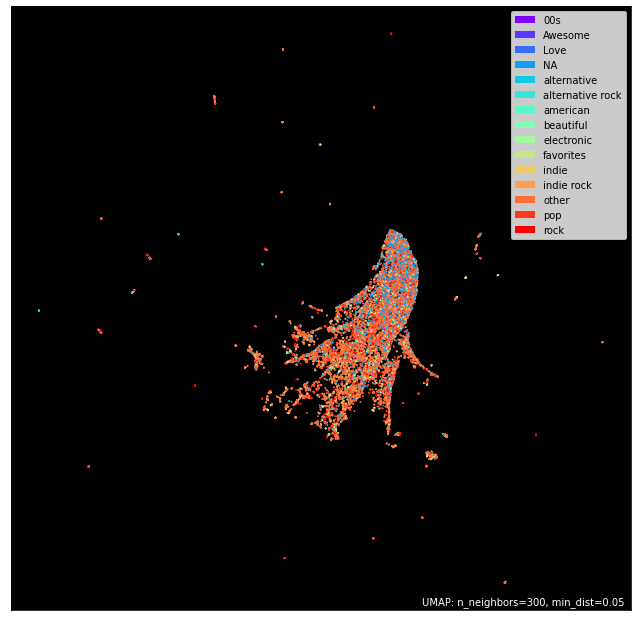

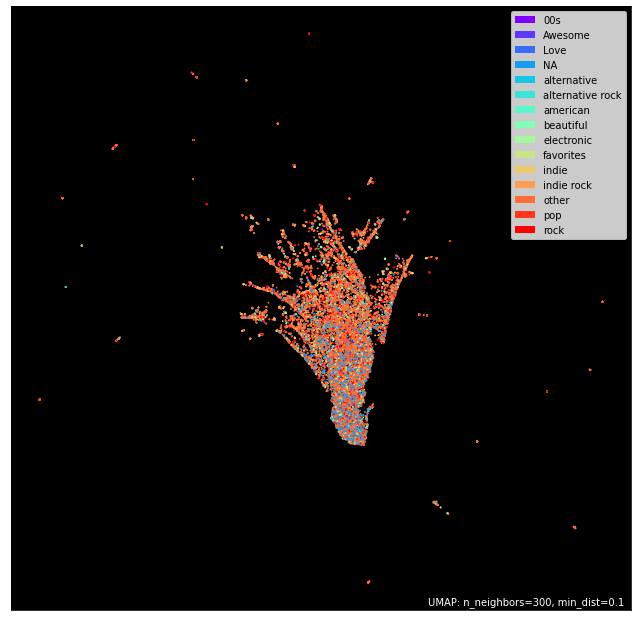

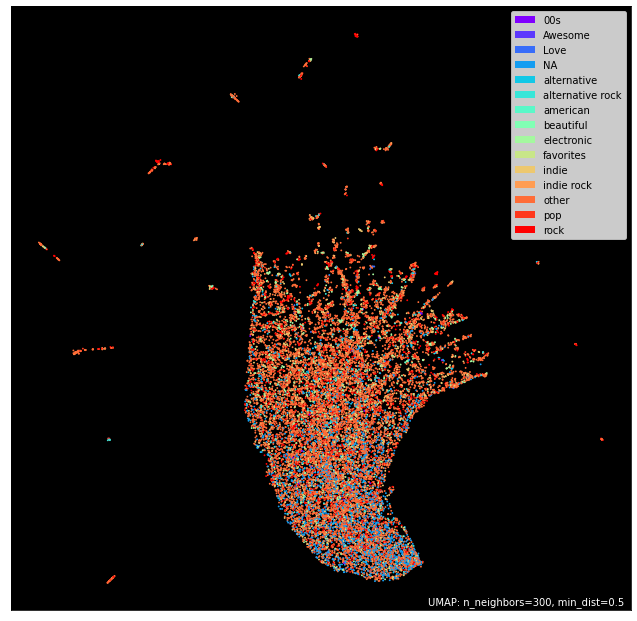

In [44]:
nn = n_neighbors[1]
for s in spread:
    for md in min_dist:
        start_time = time.time()
        mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
                     n_neighbors = nn, spread = s, min_dist = md,).fit(scaled_data_withNAother)

        umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
        end_time = time.time()
        str(datetime.timedelta(seconds = end_time - start_time))

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.05, n_neighbors=400,
     random_state=42, spread=0.5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 08:56:39 2021 Finding Nearest Neighbors
Mon May 17 08:56:39 2021 Building RP forest with 12 trees
Mon May 17 08:56:39 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 08:59:54 2021 Finished Nearest Neighbor Search
Mon May 17 08:59:56 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 09:00:22 2021 Finished embedding
UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=400, random_state=42,
     spread=0.5, verbose=True)
Construct fuzzy simplicial set
Mon May

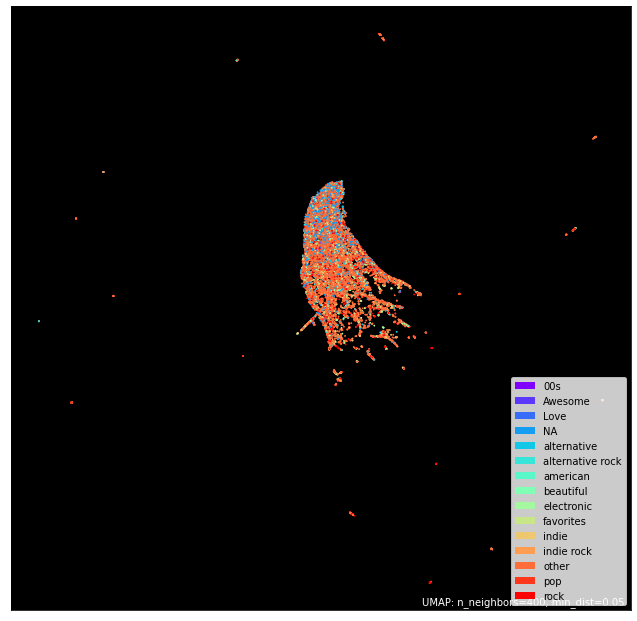

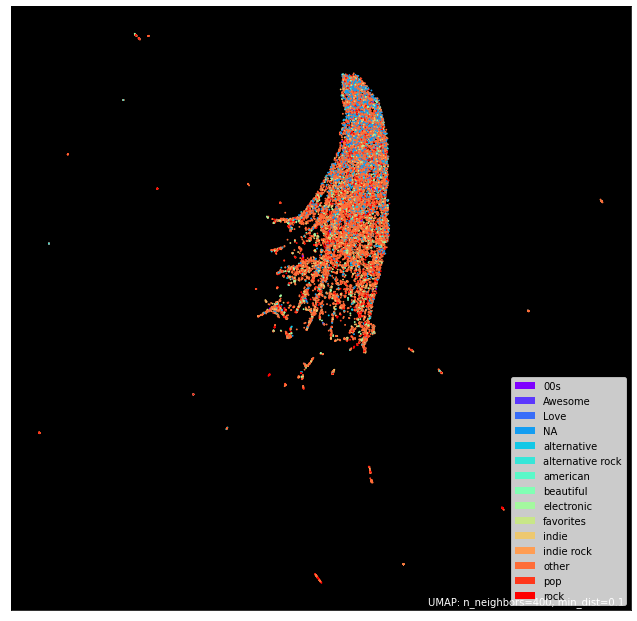

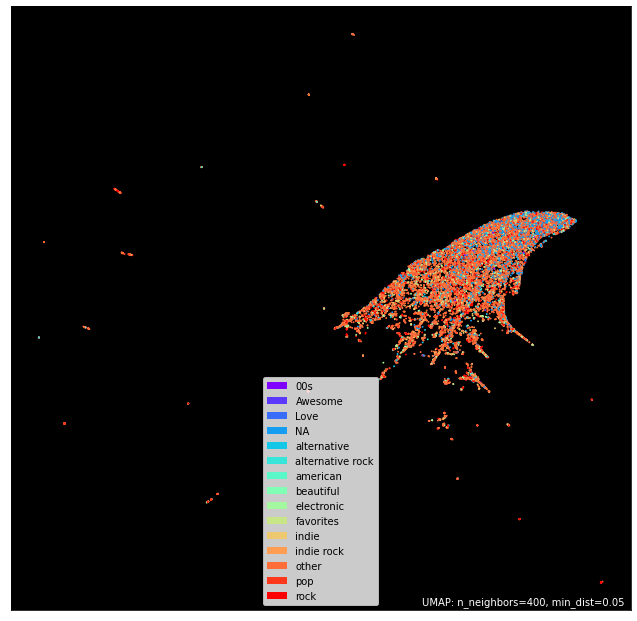

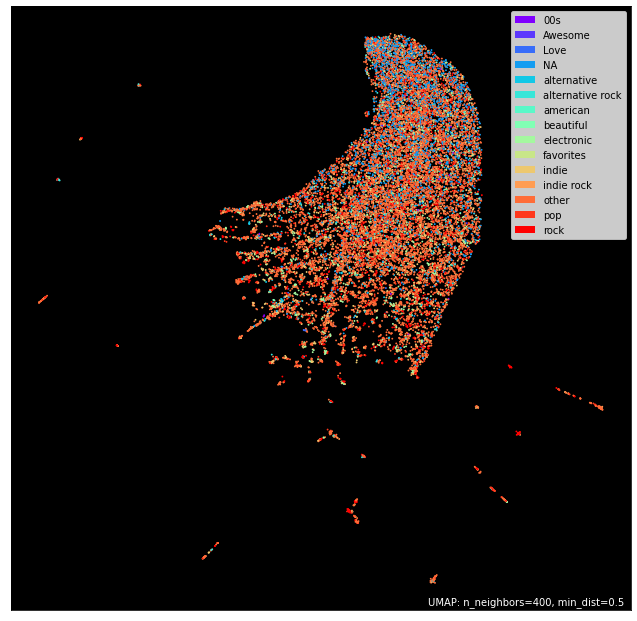

In [45]:
nn = n_neighbors[2]
for s in spread:
    for md in min_dist:
        start_time = time.time()
        mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
                     n_neighbors = nn, spread = s, min_dist = md,).fit(scaled_data_withNAother)

        umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
        end_time = time.time()
        str(datetime.timedelta(seconds = end_time - start_time))

2. Dataset without NA and other genre

2.1 Some trial tunes

<AxesSubplot:>

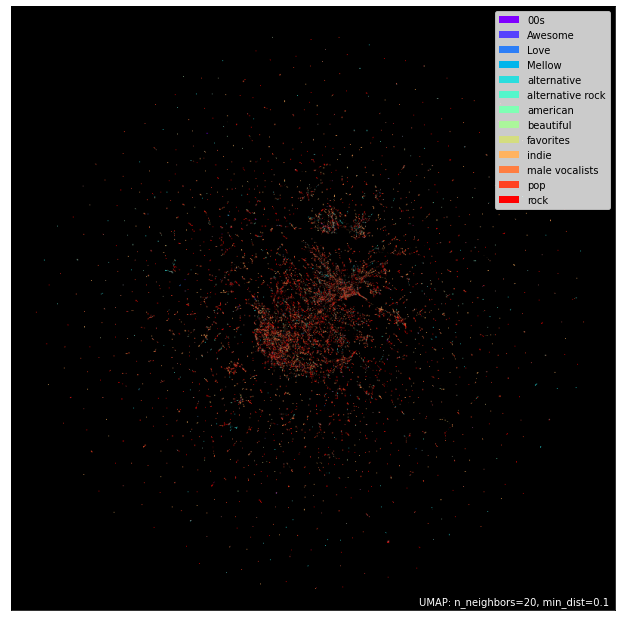

In [34]:
mapper_withoutNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[0]).fit(scaled_data_withoutNAother)

umap.plot.points(mapper_withoutNAother, labels = labels_withoutNAother, theme = 'fire')
# plt.savefig('10_0.01_100_percent_400k_66.eps')

In [ ]:
mapper_withoutNAother = UMAP(random_state=42, n_components=2, verbose = True, 
              spread = 2, n_neighbors = 200,
             min_dist = 0.001).fit(scaled_data_withoutNAother)

<AxesSubplot:>

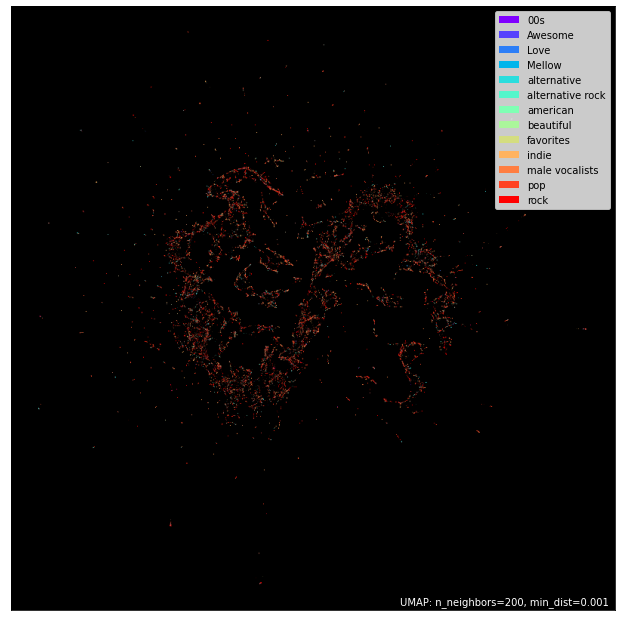

In [30]:
labels = df_plot['track_genre']
umap.plot.points(mapper_withoutNAother, labels = labels, theme = 'fire')
# plt.savefig('10_0.01_100_percent_400k_66.eps')

2.2 Grid search

In [ ]:
for nn in n_neighbors:
    for s in spread:
        for md in min_dist:
            start_time = time.time()
            mapper_withoutNAother = UMAP(random_state=42, n_components=2, verbose = True, 
                         n_neighbors = nn, spread = s, min_dist = md,).fit(scaled_data_withoutNAother)

            umap.plot.points(mapper_withoutNAother, labels = labels_withoutNAother, theme = 'fire')
            end_time = time.time()
            str(datetime.timedelta(seconds = end_time - start_time))

### Final selected UMAP learning and plot with selected dataset and selected parameters

1. Plot on full dataset of df_final

In [47]:
features = df_final[
    [
        "feature_0",
        "feature_1",
        "feature_2",
        "feature_3",
        "feature_4",
        "feature_5",
        "feature_6",
        "feature_7",
        "feature_8",
        "feature_9",
    ]
].values

labels = df_final['track_genre']

In [12]:
start_time = time.time()

In [48]:
mapper = UMAP(random_state=42, n_components=2, verbose = True, 
              spread = 0.75, n_neighbors = 200,
             min_dist = 0.5).fit(features)

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.5, n_neighbors=400,
     random_state=42, spread=0.75, verbose=True)
Construct fuzzy simplicial set
Mon May 17 09:37:39 2021 Finding Nearest Neighbors
Mon May 17 09:37:39 2021 Building RP forest with 18 trees
Mon May 17 09:37:40 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 09:48:38 2021 Finished Nearest Neighbor Search
Mon May 17 09:48:44 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 09:52:25 2021 Finished embedding


In [ ]:
end_time = time.time()

In [ ]:
str(datetime.timedelta(seconds = end_time - start_time))

In [49]:
umap.plot.points(mapper, labels = labels, theme = 'fire')
plt.savefig('400nn_0.75s_0.5md.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


2. Plot on full dataset, without NA other

In [12]:
start_time = time.time()

In [50]:
mapper = UMAP(random_state=42, n_components=2, verbose = True, 
              spread = 0.75, n_neighbors = 200,
             min_dist = 0.5).fit(scaled_data_withoutNAother)

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.5, n_neighbors=200,
     random_state=42, spread=0.75, verbose=True)
Construct fuzzy simplicial set
Mon May 17 09:55:40 2021 Finding Nearest Neighbors
Mon May 17 09:55:40 2021 Building RP forest with 12 trees
Mon May 17 09:55:40 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Mon May 17 09:57:39 2021 Finished Nearest Neighbor Search
Mon May 17 09:57:40 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 09:58:12 2021 Finished embedding


In [ ]:
end_time = time.time()

In [ ]:
str(datetime.timedelta(seconds = end_time - start_time))

<AxesSubplot:>

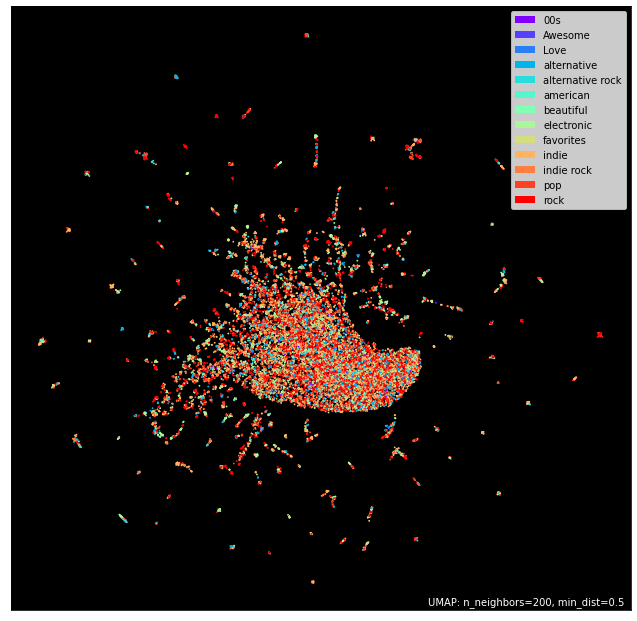

In [52]:
umap.plot.points(mapper, labels = labels_withoutNAother, theme = 'fire')
# plt.savefig('400nn_0.75s_0.5md.eps')